# **Project Leyenda - Deliverable 2**

*Group* : 
|Author|Center|Promo|Mail| 
|---|---|---|---|
|De Jesus Correia Alexandre|Nanterre|FISE INFO A5|alexandre.dejesuscorreia@viacesi.fr|
|Charlut Steven|Nanterre|FISE INFO A5|steven.charlut@viacesi.fr|
|Debraize Killian|Nanterre|FISE INFO A5|killian.debraize@viacesi.fr|
|Raies Youssef|Nanterre|FISE INFO A5|youssef.raies@viacesi.fr|
|Kinya Mwongera Sharon|Nanterre|FISE INFO A5|sharon.kinyamwongera@viaceis.fr|

<br>
<img src ="https://i.imgflip.com/96cuk7.jpg" width="500">

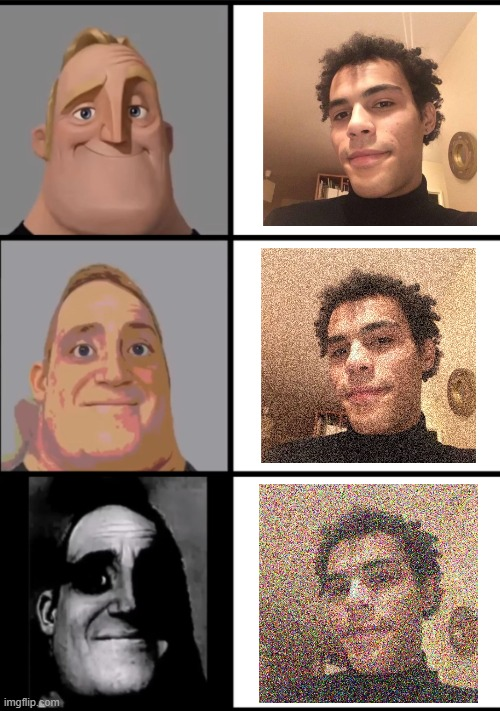


# **Project**

## Context :

**TouNum**, a company specializing in the digitization of documents (text, images, etc.), is looking to expand its services to include 'Machine Learning' tools. Their current focus is on providing solutions for companies with large volumes of documents that need digitization, and they want to offer a service for automatic image categorization. Although TouNum has experience in digitization, they lack expertise in Machine Learning and have turned to CESI Data Science specialists to develop a solution. The proposed solution aims to analyze and describe images (captioning) in an automated way.

In addition to this core goal, there are two main challenges:
- **`Image Cleaning`** : Due to variations in image quality (e.g., blurriness, noise), a cleaning/pre-processing step is required before analyzing the images.
- **`Image Classification`** : Since many of the digitized images are not actual photos but could be documents, diagrams, sketches, or paintings, there needs to be an initial classification step to separate photographs from other types of images.

Luckily, TouNum has a dataset with thousands of categorized and labeled images, which can be used for supervised learning to train the necessary models.

## Objectives :

The project has three main objectives that will lead to a fully automated image analysis and captioning solution:
- **`Binary Classification`** :
Develop a neural network model using TensorFlow and SciKit to classify images into two categories—photos and non-photos (e.g., scanned documents, diagrams, paintings). Ideally, the model should differentiate between photos and other types of images, including drawings or paintings. This module will involve image pre-processing and the use of convolutional neural networks (CNN).
- **`Image Processing`** :
Implement image cleaning and pre-processing techniques using simple convolution filters to enhance the quality of the images before running further analyses. This step ensures that images are clear enough for subsequent classification and captioning tasks.
- **`Image Captioning`** :
Build a captioning model that automatically generates descriptive captions for images. This will require using a combination of convolutional neural networks (CNNs) for image processing and recurrent neural networks (RNNs) to generate textual descriptions. The model will be trained using classical datasets for image captioning.

The final solution should be presented as a reproducible workflow (using Jupyter notebooks), and the prototype must be ready for deployment within five weeks. The workflow should be scalable and adaptable to any image data and include clear documentation to ensure maintenance and further development.

## Tools : 

For our project, we will utilize **`Python`** as our programming language. Python offers libraries, such as NumPy and Pandas, that facilitate efficient data manipulation and analysis, while libraries like Scikit-learn and TensorFlow provide robust tools for implementing machine learning (ML) and deep learning (DL) algorithms.

**`TensorFlow`**, a powerful open-source framework designed for building and deploying ML and DL models, will be our main project tool.
It operates on the concept of 'tensors', which are multi-dimensional arrays that allow for efficient data representation and manipulation. The term 'flow' refers to the way data moves through a computational graph, where operations are represented as nodes and tensors as edges. This architecture enables TensorFlow to optimize the performance of complex mathematical computations, making it ideal for tasks such as neural network training and inference. 

Moreover, TensorFlow provides a rich ecosystem with high-level APIs, such as **`Keras`**, for quick model prototyping, along with lower-level operations for fine-tuning performance.

# **Deliverable 2 : Image Processing**

As part of the TouNum project, the focus is to create a fully automated solution for analyzing and captioning images. A critical step in achieving this objective is **to enhance the quality of the images** to make them more suitable for subsequent tasks. Image quality can significantly affect the accuracy of classification and captioning models, especially when dealing with noisy or low-quality data. Therefore, an effective image pre-processing phase is essential.

In this deliverable, the goal is to process a set of noisy images and improve their quality through a **denoising technique**. The chosen method involves using a convolutional autoencoders, a type of neural network architecture designed specifically for image denoising. Convolutional autoencoders combine convolutional layers, which are effective in preserving spatial relationships in images, with the autoencoder's ability to learn efficient representations of the input data. This approach aims **to remove noise while retaining important details**, resulting in higher-quality images that can enhance the performance of downstream algorithms.

## Basic Theory : 

***The detailed description of autoencoders, including their architecture and functionality, were thoroughly covered in the previous deliverable 1. This prior discussion provides the necessary foundation for understanding how convolutional autoencoders can be applied to the current 'Image Denoising' task.***

#### Denoising Autoencoder (DAE): 

**Autoencoders** are types of neural network architecture used for unsupervised learning, consisting of an encoder and a decoder. The encoder encodes the input data into a lower dimensional space while the decode decodes the encoded data back to the original input. The network is trained to minimize the difference between decoded data and input. But they have the risk of becoming an *'Identify function'*, meaning the output equals the input, which makes the whole neural network of autoecoders useless. This generally happens when there are more nodes in the hidden layer than there are inputs.

A **`Denoising Autoencoder`** is a modification of the original autoencoder in which, instead of giving the original input, we give a **corrupted or noisy version of input** to the encoder, while decoder loss is calculated concerning original input only. This results in efficient learning of autoencoders and the risk of autoencoder becoming an 'identity function' is significantly reduced.

The DAE architecture resembles a standard autoencoder,  so it consists of two main components:
- the **`Encoder`** : **it receives noisy version of the original input**, and generates an encoding in a low-dimensional space. There are several ways to generate a corrupted input. The most common being adding a *Gaussian noise* or randomly masking some of the inputs.
- the **`Decoder`** : similar to encoders, it takes the encoding generated by the encoder as input and reconstructs the original data. When calculating the **Loss function**, it compares the output values with the original input, not with the corrupted input.

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20240107093422/DAE.jpeg" width="600">

The objective of DAE is to minimize the difference between the original input (clean input) and the reconstructed output. This is quantified using a **`Reconstruction Loss Function`**. Two types of loss function are generally used depending on the type of input data.

**Mean Squared Error (MSE)** :
If we have input image data in the form of floating pixel values, i.e. values between (0 to 1) or (0 to 255), we can use MSE :

    MSE(X,Y) = (1/n) * Σ (Xi – Yi)²

With : each of Xi is the pixel value of input data, Yi is the pixel value of reconstructed data, n is the number of predictions.

**Binary Cross-Entropy (log-loss) :**
If we have input image data in the form of bits pixel values, i.e. values will be either 0 or 1 only, then we can use Binary Cross-Entropy loss for each pixel value :

    LL(x,y) = (1/n) * Σ (Xi*ln(Yi) + (1-Xi)*ln(1-Yi))

With : each of Xi is the pixel value of input data, Yi is the pixel value of reconstructed data, n is the number of predictions.

It is important to note that other loss functions can be used, each offering unique advantages and playing a pertinent role in optimizing different aspects of model performance depending on the specific task and objectives.

# **Building a Denoising Autoencoder for Image Processing**

Now that we have established the theoretical foundations regarding image processing, we can move on to the creation of our model. In the next section, we will design and implement our denoising autoencoder model. 

## 1. Initial Setup

In [2]:
# Displays Matplotlib graphics directly in the Jupyter notebook
%matplotlib inline

In [3]:

# Import libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input, BatchNormalization, Add, Dense, Flatten, Reshape, Dropout
from tensorflow.keras.models import Model
from keras_tuner import RandomSearch
from tensorflow.keras.applications import VGG19
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.regularizers import l2
import keras_tuner as kt
import visualkeras
from tensorflow.keras.callbacks import EarlyStopping
from keras_tuner import RandomSearch

import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random
from collections import Counter
from PIL import Image

In [4]:
# Loading Images Function 
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            images.append(img)  
    return images  

# Preprocess Images Function
def check_image_resolutions(folder):
    resolutions = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            resolutions.append(img.shape[:2])  # (height, width)
    return resolutions

In [5]:
# DataSet Loading
base_dir = os.getcwd()
relative_path = r"..\..\DataSets\Dataset_delivrable_2\Dataset"
dataset_dir = os.path.normpath(os.path.join(base_dir, relative_path))

#### Image Resolution Distribution
We will first check the resolution of the dataset images to resize them to a size relevant for the autoencoder. This ensures that images are consistent and optimized to improve the model’s training efficiency.

Nombre de résolutions uniques : 54


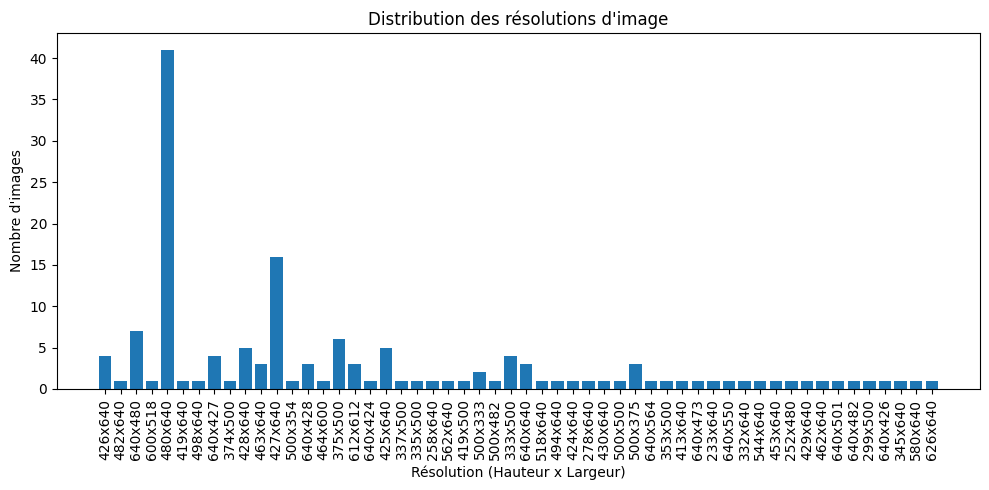

In [6]:
# This function scans a directory containing images and returns a list of resolutions (height, width).
    
def check_image_resolutions(dataset_dir):

    image_resolutions = []
    
    for filename in os.listdir(dataset_dir):
        file_path = os.path.join(dataset_dir, filename)
        
        try:
            with Image.open(file_path) as img:
                resolution = img.size  # (width, height)
                image_resolutions.append(resolution[::-1])  # Invert to have (height, width)
        except Exception as e:
            print(f"Error while opening the file {filename}: {e}")

    return image_resolutions

# Load image resolutions
image_resolutions = check_image_resolutions(dataset_dir)

# Get the single resolutions
unique_resolutions = set(image_resolutions)
print(f"Number of single resolutions : {len(unique_resolutions)}")

# Count of occurrences of each resolution
resolution_counter = Counter([f"{res[0]}x{res[1]}" for res in image_resolutions])

# Prepare data for chart
resolutions, counts = zip(*resolution_counter.items()) 

# Plot
plt.figure(figsize=(10, 5))
plt.bar(resolutions, counts) 
plt.xticks(rotation=90)
plt.title("Distribution of image resolutions")
plt.xlabel("Resolution (Height x Width)")
plt.ylabel("Number of images")
plt.tight_layout()  
plt.show()

The **Dominant Resolution** is **(640x480)** :
- The resolution 640x480 is clearly the most common, with about 40 images. This is probably a standard resolution for a large part of the images in our dataset.
- This resolution is standard for images from old cameras, screenshots or certain types of videos.

Bu we also have a **Variety of Resolutions**:
- Although 640x480 resolution dominates, the dataset has a wide variety of resolutions (54 single resolutions),
- Some resolutions are very poorly represented, with only one or two images per resolution.

In [7]:
# Load dataset and resize images
dataset_images = load_images_from_folder(dataset_dir)
num_images = len(dataset_images)
print(f"Number of images in our dataset : {num_images}")

Nombre d'images dans notre dataset : 148


In [8]:
# Verification of the Dataset status
def load_images_with_check(folder):
    images = []
    corrupted_files = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            img = cv2.imread(img_path)
            if img is not None:
                images.append(img)  
            else:
                corrupted_files.append(filename) 
        except Exception as e:
            print(f"Error loading of {filename}: {e}")
            corrupted_files.append(filename) 
    return images, corrupted_files
dataset_images, corrupted_files = load_images_with_check(dataset_dir)

# Afficher le nombre d'images corrompues
print(f"Number of corrupted or missing images : {len(corrupted_files)}")

Nombre d'images corrompues ou manquantes : 0


# 2. Data Exploration 

### 2.1. Dataset Visualization

Here, we have a data set that is really **small** to perform deep learning on.

**Consequences of a small dataset** :
- **Risk of overfitting** : With a small dataset, it is easy for a model to overlearn data, that is to memorize specific images instead of learning general patterns. This means that your model might work well on the training game but not so well on new images (or a test game).
- **Lack of diversity** : If images are too similar to each other, the model may not learn how to handle larger variations (such as different types of noise or light variations), which can affect its ability to effectively decipher new or unseen images.
- **Performance limitation** : A small dataset limits the amount of information that the model can exploit, which could limit its final performance, especially on complex architectures like convolutional autoencoders, who have many parameters to train.

In [9]:
# Display Images
def display_sample_images(images, num_images=5):
    plt.figure(figsize=(10, 10))
    for i in range(min(num_images, len(images))): 
        plt.subplot(1, num_images, i + 1)
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)) 
        plt.axis('off')  
    plt.show()

# Calculate Pixels Stats from Images
def calculate_image_statistics(images):
   
    pixel_values = np.concatenate([img.ravel() for img in images]) 
    mean = np.mean(pixel_values)
    median = np.median(pixel_values)
    std = np.std(pixel_values)
    
    print(f"Mean Pixel: {mean:.4f}")
    print(f"Pixel Median: {median:.4f}")
    print(f"Standard Deviation of Pixels: {std:.4f}")

# Plot Function
def plot_color_distribution(images):
    reds = np.concatenate([img[:, :, 2].ravel() for img in images]) 
    greens = np.concatenate([img[:, :, 1].ravel() for img in images])  
    blues = np.concatenate([img[:, :, 0].ravel() for img in images])  
    
    plt.figure(figsize=(10, 5))
    plt.hist(reds, bins=50, color='red', alpha=0.6, label='Red')
    plt.hist(greens, bins=50, color='green', alpha=0.6, label='Green')
    plt.hist(blues, bins=50, color='blue', alpha=0.6, label='Blue')
    plt.title("Distribution of intensity of color channels")
    plt.xlabel("Pixel Value")
    plt.ylabel("Number of Pixels")
    plt.legend()
    plt.show()

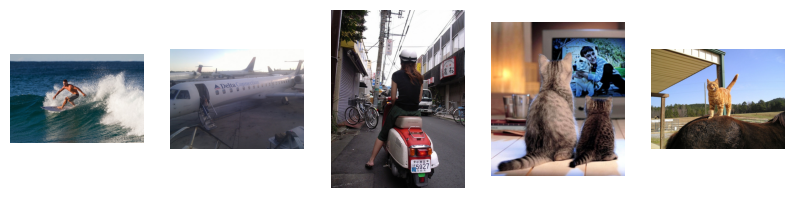

In [10]:
# Show Examples
display_sample_images(dataset_images)

Then, we calculate the distribution of pixel values in our dataset.

In [11]:
calculate_image_statistics(dataset_images)

Moyenne des pixels: 117.6791
Médiane des pixels: 115.0000
Écart-type des pixels: 71.6981


In our image dataset, after calculating some stats of pixel values without resizing images, we get the following results:

    Average pixels : 117.6791
    Pixel median : 115.0000
    Standard pixel deviation : 71.6981

We can conclude that:
1. **Average pixels** :
    - The pixel average is 117.6791 on a scale of [0, 255], which represents pixel values close to the middle of this range. This means that, overall, our images have a medium to slightly darker brightness than the middle (which would be 127.5).
    - An average of around 117 indicates that our images contain a balanced combination of dark and light areas, but with a slight predominance of darker hues.
2. **Pixel median** :
    - The pixel median is 115.0000, very close to the average. This suggests that the distribution of pixel values is relatively symmetrical. In other words, most of the pixels in our images are spread around this median value, with little bias towards extremely dark or extremely clear values.
    - The proximity of the mean to the median indicates that there are no extreme values or significant imbalance in the distribution of pixel intensities.
3. **Standard deviation of pixels** :
    - The standard deviation of 71.6981 shows that there is significant variability in pixel values in our dataset. A high standard deviation indicates that the pixel values are widely scattered around the average, which means that our images contain both very dark and very bright areas with good contrast.
    - This may be of interest to image processing algorithms, as such contrast could improve our model’s ability to distinguish details in images.

**General Conclusion** :

Pixel statistics show that our images have a slightly lower average brightness than the average of the scale [0, 255], with a good symmetrical distribution of pixel values and high contrast. This is ideal for a decoding or image enhancement phase, as our images contain a variety of intensities and high contrast, which can help the model better capture details and transition areas in the images.

These observations give us a good overview of the pixel distribution in our dataset, and confirm that our images have a diversity of bright and dark areas, which could be beneficial for image processing algorithms such as a convolutional autoencoder (CAE).

### 2.2. Distribution of Pixel Intensities

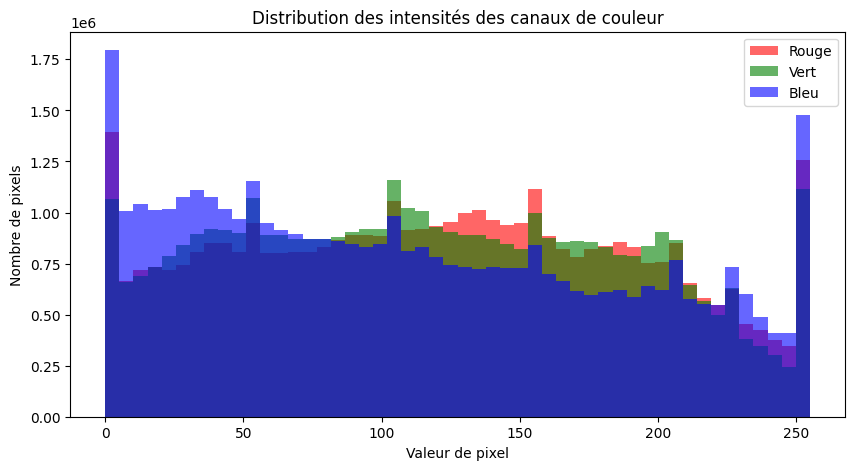

In [12]:
plot_color_distribution(dataset_images)

**Contrast in Images** :
- Peaks at the extremes 0 and 1 indicate high contrast in images, which is a characteristic to be considered for noise removal. The noise removal may need to preserve these high contrast areas to maintain sharpness of edges and fast transition areas in images.

**Colour Variability** :
- The different distributions between channels show that our images contain a good diversity of colors, although there is a slight predominance of bluish hues. This can affect how the autoencoder should process each channel to improve overall image quality while respecting color variation.

**Noise Addition and Defrag** :
- When we add noise to these images to drive our autoencoder, it is essential to see how the noise affects these peaks at extreme values (0 and 1) and intermediate zones. During the defrag, the autoencoder must be able to reconstruct these high contrast areas and the dominant colors correctly.

### 2.3. Resizing the dataset

The fact that our images have different resolutions poses several challenges for later stages, especially for training a machine learning model. Deep learning models, especially convolutional neural networks (CNNs), require all input images to be the same size. This allows for a consistent data structure, making it easier to learn and apply convolution filters.

Here are the reasons why **resizing is important and beneficial for our dataset** :

- Standardization of data:
    - Our images have varying resolutions, which can lead to inconsistencies in the results of machine learning operations. By resizing all images to a common size (for example, 128x128 or 256x256), we ensure that all images have the same number of pixels, which is essential for consistent input into a machine learning model.
    - Performance optimization:
    Very high resolutions require more memory and computing power, which can significantly slow down the training process. Resizing reduces computational complexity while retaining important visual information.

By resizing images to a reasonable size (for example, 128x128 or 256x256), we get a **good compromise between the preservation of visual details and the requirements in terms of material resources**.

- Reduction of size bias:
    - If we have images of very different resolutions (large and small), the larger images may be more important in learning the model because they contain more pixels. Resizing allows each image to be treated fairly.

- Simplification of preprocessing steps:
    - Many pre-processing techniques (adding noise, removing noise, etc.) also require that the images have uniform sizes. By applying global resizing, we simplify these steps and prepare the images for optimal processing.

**Choosing the size of the resize** : When choosing the size of the resize, it is important to find a compromise between the conservation of visual details and the efficiency of the model’s training. 
    - 128x128 : This size is often used in decoding or image recognition projects because it allows to capture enough details while maintaining a low computational complexity.
    - 256x256 : If our images contain a lot of fine details, a 256x256 resize might be a better option. This will retain more visual detail, but require more memory and computation time.

In [13]:
# Function to resize all images in the dataset to a given size
def resize_images(images, target_size):
    resized_images = []
    for img in images:
        resized_img = cv2.resize(img, target_size)
        resized_img = resized_img.astype('float16') / 255.0  
        resized_images.append(resized_img)
    return np.array(resized_images, dtype=np.float16)  # Convert to float16

### 2.4. Dataset Augmentation

We will reuse the photos of deliverable 1 to create a larger data set we will create 3 data sets of different sizes to divide our try:
- original size (148 images)
- Small size (1000 images)
- Intermediate size (5000 images) 
- Large size (10,000 images)

In [14]:
def create_augmented_dataset(original_images, additional_images, target_size):
    num_images_to_add = target_size - len(original_images)
    additional_images_sample = random.sample(additional_images, num_images_to_add)
    augmented_dataset = original_images + additional_images_sample

    return augmented_dataset

In [15]:
base_dir = os.getcwd()
relative_path = r"..\..\DataSets\data_set_livrable_1\Photo"
additional_dataset_dir =  os.path.normpath(os.path.join(base_dir, relative_path))

additional_images, corrupted_files = load_images_with_check(additional_dataset_dir)
print("number of photos in the additional data set :",len(additional_images))
print("number of corrupted photos in this same data set :",len(corrupted_files))

nombre de photo dans le data set suplémentaire : 9997
nombre de photo corrompu dans ce même data set : 0


In [16]:
# Create the datasets
augmented_dataset_1000 = create_augmented_dataset(dataset_images, additional_images, 1000)
## augmented_dataset_5000 = create_augmented_dataset(dataset_images, additional_images, 5000)
## augmented_dataset_10000 = create_augmented_dataset(dataset_images, additional_images, 10000)

In [17]:
print(len(augmented_dataset_1000))
## print(len(augmented_dataset_5000))
## print(len(augmented_dataset_10000))

1000


In [18]:
# Resize the datasets
dataset_images128 = resize_images(dataset_images, (128, 128))
dataset_images256 = resize_images(dataset_images, (256, 256))

augmented_dataset_1000_resized128 = resize_images(augmented_dataset_1000, (128, 128))
augmented_dataset_1000_resized256 = resize_images(augmented_dataset_1000, (256, 256))

## augmented_dataset_5000_resized128 = resize_images(augmented_dataset_5000, (128, 128))
## augmented_dataset_5000_resized256 = resize_images(augmented_dataset_5000, (256, 256))

## augmented_dataset_10000_resized128 = resize_images(augmented_dataset_10000, (128, 128))
## augmented_dataset_10000_resized256 = resize_images(augmented_dataset_10000, (256, 256))

In [19]:
print(augmented_dataset_1000_resized128.shape)
## print(augmented_dataset_5000_resized256.shape)

(1000, 128, 128, 3)


In [20]:
print(dataset_images128[0][0:5, 0:5, :])

[[[0.7256 0.6904 0.639 ]
  [0.7256 0.6904 0.643 ]
  [0.7256 0.6904 0.6353]
  [0.7334 0.686  0.639 ]
  [0.7373 0.6904 0.643 ]]

 [[0.7334 0.686  0.639 ]
  [0.7295 0.682  0.6353]
  [0.7295 0.686  0.6313]
  [0.7295 0.682  0.6353]
  [0.7334 0.686  0.639 ]]

 [[0.7295 0.682  0.6353]
  [0.7295 0.682  0.6353]
  [0.7295 0.686  0.6313]
  [0.7295 0.682  0.6353]
  [0.7295 0.682  0.6353]]

 [[0.7295 0.682  0.6353]
  [0.7295 0.682  0.6353]
  [0.7256 0.682  0.6274]
  [0.7295 0.686  0.6313]
  [0.7256 0.678  0.6313]]

 [[0.7295 0.682  0.6353]
  [0.7295 0.682  0.6353]
  [0.7295 0.686  0.6313]
  [0.7334 0.6904 0.6353]
  [0.7295 0.686  0.6313]]]


## 3. Data Preparation

### 3.1. Train/Test Split

In [21]:
# ************************************************* Orginal data set L148 **************************************************#
# Split the original dataset resized (128x128)
train_images_orginal_R128 = dataset_images128[:int(len(dataset_images128) * 0.8)]
test_images_orginal_R128 = dataset_images128[int(len(dataset_images128) * 0.8):]
# Split the original dataset resized (256x256)
train_images_orginal_R256 = dataset_images256[:int(len(dataset_images256) * 0.8)]
test_images_orginal_R256 = dataset_images256[int(len(dataset_images256) * 0.8):]

# ************************************************* augmented data set L1000 ***********************************************#
# Split the augmented dataset 1000 resized (128x128)
train_images_augmented_L1000_R128 = augmented_dataset_1000_resized128[:int(len(augmented_dataset_1000_resized128) * 0.8)]
test_images_augmented_L1000_R128  = augmented_dataset_1000_resized128[int(len(augmented_dataset_1000_resized128) * 0.8):]

# Split the augmented dataset 1000 resized (256x256)
train_images_augmented_L1000_R256 = augmented_dataset_1000_resized256[:int(len(augmented_dataset_1000_resized256) * 0.8)]
test_images_augmented_L1000_R256  = augmented_dataset_1000_resized256[int(len(augmented_dataset_1000_resized256) * 0.8):]

# ************************************************* augmented data set L5000 ***********************************************#

# Split the augmented dataset 5000 resized (128x128)
## train_images_augmented_L5000_R128 = augmented_dataset_5000_resized128[:int(len(augmented_dataset_5000_resized128) * 0.8)]
## test_images_augmented_L5000_R128  = augmented_dataset_5000_resized128[int(len(augmented_dataset_5000_resized128) * 0.8):]
# Split the augmented dataset 5000 resized (256x256)
## train_images_augmented_L5000_R256 = augmented_dataset_5000_resized256[:int(len(augmented_dataset_5000_resized256) * 0.8)]
## test_images_augmented_L5000_R256  = augmented_dataset_5000_resized256[int(len(augmented_dataset_5000_resized256) * 0.8):]

# ************************************************* augmented data set L10 000 ***********************************************#
# Split the augmented dataset 10000 resized (128x128)
## train_images_augmented_L10000_R128 = augmented_dataset_10000_resized128[:int(len(augmented_dataset_10000_resized128) * 0.8)]
## test_images_augmented_L10000_R128  = augmented_dataset_10000_resized128[int(len(augmented_dataset_10000_resized128) * 0.8):]

# Split the augmented dataset 10000 resized (256x256)
## train_images_augmented_L10000_R256 = augmented_dataset_10000_resized256[:int(len(augmented_dataset_10000_resized256) * 0.8)]
## test_images_augmented_L10000_R256  = augmented_dataset_10000_resized256[int(len(augmented_dataset_10000_resized256) * 0.8):]


### 3.2. Creating Noise

The following code adds **`Gaussian noise`** to the images by generating random values from a normal distribution, scaling them with the noise_factor, and adding the noise to the original image pixel values. 

In [22]:
# Add noise to the images
def create_data_set_noise_batch(noise_factor, train_images, test_images, batch_size=500):
    train_noisy = []
    test_noisy = []
    
    for i in range(0, len(train_images), batch_size):
        batch_train = train_images[i:i+batch_size]
        noise_train = noise_factor * np.random.normal(loc=0.0, scale=1.0, size=batch_train.shape).astype('float32')
        noisy_batch_train = np.clip(batch_train + noise_train, 0., 1.)
        train_noisy.append(noisy_batch_train)
    
    for i in range(0, len(test_images), batch_size):
        batch_test = test_images[i:i+batch_size]
        noise_test = noise_factor * np.random.normal(loc=0.0, scale=1.0, size=batch_test.shape).astype('float32')
        noisy_batch_test = np.clip(batch_test + noise_test, 0., 1.)
        test_noisy.append(noisy_batch_test)
    
    return np.vstack(train_noisy), np.vstack(test_noisy)

In [23]:
# ************************************************* Orginal data set L148 ***********************************************#
#Add noise to the original dataset resized (128x128)
train_noisy_orginal_R128, test_noisy_orginal_R128 = create_data_set_noise_batch(noise_factor=0.5,train_images = train_images_orginal_R128,test_images = test_images_orginal_R128)
#Add noise to the original dataset resized (256x256)
train_noisy_orginal_R256, test_noisy_orginal_R256 = create_data_set_noise_batch(noise_factor=0.5,train_images = train_images_orginal_R256,test_images = test_images_orginal_R256)

In [24]:
# ************************************************* augmented data set L1000 ***********************************************#

#Add noise to the augmented dataset 1000 resized (128x128)
train_noisy_augmented_L1000_R128, test_noisy_augmented_L1000_R128 = create_data_set_noise_batch(noise_factor=0.5,train_images = train_images_augmented_L1000_R128 ,test_images = test_images_augmented_L1000_R128,batch_size=500)
#Add noise to the augmented dataset 1000 resized (256x256)
train_noisy_augmented_L1000_R256, test_noisy_augmented_L1000_R256 = create_data_set_noise_batch(noise_factor=0.5,train_images = train_images_augmented_L1000_R256,test_images = test_images_augmented_L1000_R256,batch_size=500)

In [25]:
# ************************************************* augmented data set L5000 ***********************************************#
#Add noise to the augmented dataset 5000 resized (128x128)
train_noisy_augmented_L5000_R128, test_noisy_augmented_L5000_R128 = create_data_set_noise_batch(noise_factor=0.5,train_images = train_images_augmented_L5000_R128 ,test_images = test_images_augmented_L5000_R128,batch_size=250)
#Add noise to the augmented dataset 1000 resized (256x256)
train_noisy_augmented_L5000_R256, test_noisy_augmented_L5000_R256 = create_data_set_noise_batch(noise_factor=0.5,train_images = train_images_augmented_L5000_R256,test_images = test_images_augmented_L5000_R256,batch_size=250)

In [25]:
# ************************************************* augmented data set L10000 ***********************************************#
#Add noise to the augmented dataset 5000 resized (128x128)
train_noisy_augmented_L10000_R128, test_noisy_augmented_L10000_R128 = create_data_set_noise_batch(noise_factor=0.5,train_images = train_images_augmented_L10000_R128 ,test_images = test_images_augmented_L10000_R128,batch_size=250)
#Add noise to the augmented dataset 1000 resized (256x256)
train_noisy_augmented_L10000_R256, test_noisy_augmented_L10000_R256 = create_data_set_noise_batch(noise_factor=0.5,train_images = train_images_augmented_L10000_R256,test_images = test_images_augmented_L10000_R256,batch_size=250)

In [25]:
train_noisy_orginal_R128.shape

(118, 128, 128, 3)

# 4. Denoising Autoencoder Architecture 

We will start with a **Convolutional Auto-Encoder (CAE) with resized images (128x128) on the dataset (1000)**.

In [26]:
# Image Dimensions Configuration
IMG_SIZE = 128                        # Image size (128x128)
IMG_CHANNELS = 3                      # Image channels (RGB)
NB_EPOCHS_DENOISE = 100               # Epoch number
BATCH_SIZE        = 64                # Batch size processing
SAV_MODEL_DENOISE = "denoiser.h5"     # Saving 
latent_dim = 96                       # Latent_Space dimension
# Encoder configuration (input = 128x128 image with 3 channels)
input_img = Input(shape=(IMG_SIZE, IMG_SIZE, IMG_CHANNELS))
input_shape = (128, 128, 3)

**Overall Presentation of our CAE Architecture** :

The model is a **Denoising U-Net Autoencoder**, which is designed to denoise images. It consists of an **encoder** (downsampling part), a **bottleneck layer**, and a **decoder** (upsampling part). The U-Net architecture is well-suited for tasks like image denoising because it combines the encoder-decoder structure with **skip connections**, allowing it to retain important image details.
1. **Encoder**  :
- The encoder progressively reduces the size of the image while capturing important features. It consists of four blocks, each of which contains:
    - Two Conv2D layers (ReLU activation, 3x3 filters) with increasing numbers of filters per block (64 → 128 → 256 → 512).
    - MaxPooling2D to halve the image dimensions after each block.
2. **Bottleneck Layer** :
- At the bottleneck (deepest part of the network), there are two Conv2D layers:
    - 1024 filters with ReLU activation. This layer captures the most abstract features of the image.
3. **Decoder** :
- The decoder progressively upsamples the image to its original size. It mirrors the encoder and consists of:
    - Conv2DTranspose layers for upsampling the image (reversing the pooling).
    - Skip connections from the encoder to retain high-resolution features.
    - Conv2D layers (with 512 → 256 → 128 → 64 filters) to refine the upsampled image.
4. **Output Layer** :
    - a Conv2D (1x1 filter) with a Sigmoid activation function to reconstruct the 3-channel output image.

**Key Components used in our Architecture** :
- Filters per Layer:
    - 64 filters in the initial layer, doubling with each block in the encoder.
    - 1024 filters in the bottleneck layer.
    - Halving the number of filters in the decoder.
- Activation Functions:
    - **ReLU** is used in all hidden layers.
    - **Sigmoid** activation is used in the output layer to normalize pixel values between 0 and 1.


### 4.1. Custom Loss Function

We decided to use a combined loss function that incorporates two complementary loss functions: Structural Similarity Index (SSIM) loss and Perceptual loss based on the VGG19 network. This combination allows us to leverage both low-level and high-level feature information to optimize the image reconstruction quality.

**`SSIM Loss`** :
The SSIM loss evaluates the similarity between two images based on structural information like luminance, contrast, and texture. Unlike pixel-wise losses (e.g., MSE or MAE), SSIM focuses on perceptual image quality, making it more suitable for tasks like image denoising, super-resolution, and generation, where preserving the overall structure of the image is critical.

**`Perceptual Loss`** :
The Perceptual loss is derived from the VGG19 network, a pre-trained CNN on the ImageNet dataset. 

Instead of focusing on pixel-wise accuracy, Perceptual loss evaluates how close two images are in the feature space of a deep neural network. 

In this project, we extract features from a mid-level convolutional layer (block3_conv3) of VGG19 to ensure that the high-level content and textures are similar between the true and predicted images.

**`Combined Loss`** :
The combined loss merges the benefits of SSIM and Perceptual loss by taking their weighted average. In our case, we use an equal weighting of 0.5 for both, although this can be adjusted depending on the specific task.

**Rationale for Combining Losses** :
-	SSIM helps maintain the structural integrity and local textures of the image, ensuring that the generated images look realistic and retain fine details.
-	Perceptual loss ensures that the high-level semantics of the reconstructed images align with the original images, preventing the model from focusing only on pixel-to-pixel accuracy.
-	The combination allows us to optimize for both local fidelity and overall perceptual quality, resulting in visually appealing and accurate outputs.


In [27]:
# SSIM Loss
def ssim_loss(y_true, y_pred):
    return 1 - tf.reduce_mean(tf.image.ssim(y_true, y_pred, max_val=1.0))

# Perceptual loss based on VGG19
vgg = VGG19(include_top=False, weights='imagenet', input_shape=(128, 128, 3))
vgg.trainable = False
layer_outputs = [vgg.get_layer('block3_conv3').output]
feature_extractor = tf.keras.Model(inputs=vgg.input, outputs=layer_outputs)

def perceptual_loss(y_true, y_pred):
    true_features = feature_extractor(y_true)
    pred_features = feature_extractor(y_pred)
    return tf.reduce_mean(tf.square(true_features - pred_features))

# Combined SSIM + Perceptual loss function
def combined_loss(y_true, y_pred):
    ssim_l = ssim_loss(y_true, y_pred)
    perceptual_l = perceptual_loss(y_true, y_pred)
    return 0.5 * perceptual_l + 0.5 * ssim_l

In [28]:
# Function to add convolution blocks with or without skip connections
def conv_block(x, filters, kernel_size=(3, 3), padding='same', strides=(1, 1), use_skip=True):
    conv = Conv2D(filters, kernel_size, strides=strides, padding=padding, activation='relu', kernel_regularizer=l2(0.001))(x)
    conv = BatchNormalization()(conv)
    if use_skip:
        skip = Conv2D(filters, kernel_size, strides=strides, padding=padding, activation='relu', kernel_regularizer=l2(0.001))(conv)
        skip = BatchNormalization()(skip)
        x = Add()([conv, skip])  # Adds features via skip connection
    return x

### 4.2. Grid Search

Like in the previous deliverable, to optimize the hyperparameters of a model, we will use **`Grid Search`** techniques as it help identify the best set of hyperparameters to improve model performance. We have selected various hyperparameters that are commonly used and others that seem relevant to our project.    

In [78]:
# SSIM Loss
def ssim_loss(y_true, y_pred):
    return 1 - tf.reduce_mean(tf.image.ssim(y_true, y_pred, max_val=1.0))

# Perceptual loss based on VGG19
vgg = VGG19(include_top=False, weights='imagenet', input_shape=(128, 128, 3))
vgg.trainable = False
layer_outputs = [vgg.get_layer('block3_conv3').output]
feature_extractor = tf.keras.Model(inputs=vgg.input, outputs=layer_outputs)

def perceptual_loss(y_true, y_pred):
    true_features = feature_extractor(y_true)
    pred_features = feature_extractor(y_pred)
    return tf.reduce_mean(tf.square(true_features - pred_features))

# Total Loss of Variation (TV)
def total_variation_loss(y_true, y_pred):
    return tf.reduce_sum(tf.image.total_variation(y_pred))

# Combination of losses with SSIM and Total Variation
def combined_loss_with_ssim_tv(y_true, y_pred):
    ssim_l = ssim_loss(y_true, y_pred)
    tv_l = total_variation_loss(y_true, y_pred)
    return 0.9 * ssim_l + 0.1 * tv_l

# Custom RMSE loss function
def rmse_loss(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

# Image Size
IMG_SIZE = 128
IMG_CHANNELS = 3

# Function to build the autoencoder with Hyperparameter Tuning
def build_autoencoder_model(hp):
    latent_dim = hp.Int('latent_dim', min_value=8, max_value=128, step=8)  # Search for latent space
    
    # Optimizer
    optimizer = hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd'])
    
    # Loss function (map names to the actual function)
    loss_choice = hp.Choice('loss', ['ssim_loss', 'perceptual_loss', 'total_variation_loss', 'combined_loss_with_ssim_tv'])

    if loss_choice == 'ssim_loss':
        loss = ssim_loss
    elif loss_choice == 'perceptual_loss':
        loss = perceptual_loss
    elif loss_choice == 'total_variation_loss':
        loss = total_variation_loss
    elif loss_choice == 'combined_loss_with_ssim_tv':
        loss = combined_loss_with_ssim_tv

    # Encoder
    input_img = Input(shape=(IMG_SIZE, IMG_SIZE, IMG_CHANNELS))

    x = Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001))(input_img)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2), padding='same')(x)  # 128x128 -> 64x64

    x = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2), padding='same')(x)  # 64x64 -> 32x32

    x = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)  # 32x32 -> 16x16

    # Latent space
    x = Flatten()(encoded)
    latent = Dense(latent_dim, activation='relu')(x)
    latent = Dropout(0.4)(latent)

    # Decoder
    x = Dense(16 * 16 * 128, activation='relu')(latent)
    x = Reshape((16, 16, 128))(x)

    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = UpSampling2D((2, 2))(x)  # 16x16 -> 32x32

    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = UpSampling2D((2, 2))(x)  # 32x32 -> 64x64

    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = UpSampling2D((2, 2))(x)  # 64x64 -> 128x128

    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)  

    # build the model
    autoencoder = Model(input_img, decoded)

    # Compile the model with hyperparameters
    autoencoder.compile(optimizer=optimizer, loss=loss)
    
    return autoencoder


In [81]:
# Instantiation of the tuner with Random Search
tuner = RandomSearch(
    build_autoencoder_model,
    objective='val_loss',           # Criteria to be optimized
    max_trials=10,                  # number of trials
    executions_per_trial=1,         # Number of workouts per combination
    directory='autoencoder_tuning',
    project_name='denoising_autoencoder'
)

Reloading Tuner from autoencoder_tuning\denoising_autoencoder\tuner0.json


In [27]:
# SSIM Loss
def ssim_loss(y_true, y_pred):
    return 1 - tf.reduce_mean(tf.image.ssim(y_true, y_pred, max_val=1.0))

# Perceptual loss based on VGG19
vgg = VGG19(include_top=False, weights='imagenet', input_shape=(128, 128, 3))
vgg.trainable = False
layer_outputs = [vgg.get_layer('block3_conv3').output]
feature_extractor = tf.keras.Model(inputs=vgg.input, outputs=layer_outputs)

def perceptual_loss(y_true, y_pred):
    true_features = feature_extractor(y_true)
    pred_features = feature_extractor(y_pred)
    return tf.reduce_mean(tf.square(true_features - pred_features))

# Total Loss of Variation (TV)
def total_variation_loss(y_true, y_pred):
    return tf.reduce_sum(tf.image.total_variation(y_pred))

# Combination of losses with SSIM and Total Variation
def combined_loss_with_ssim_tv(y_true, y_pred):
    ssim_l = ssim_loss(y_true, y_pred)
    tv_l = total_variation_loss(y_true, y_pred)
    return 0.9 * ssim_l + 0.1 * tv_l

# Custom RMSE loss function
def rmse_loss(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

# image size
IMG_SIZE = 128
IMG_CHANNELS = 3

# Function to build the autoencoder with Hyperparameter Tuning
def build_autoencoder_model(hp):
    latent_dim = hp.Int('latent_dim', min_value=8, max_value=128, step=8)  # Recherche du latent space
    
    # Optimizer
    optimizer = hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd'])
    
    # Loss function (map names to the actual function)
    loss_choice = hp.Choice('loss', ['ssim_loss', 'perceptual_loss', 'total_variation_loss', 'combined_loss_with_ssim_tv'])

    if loss_choice == 'ssim_loss':
        loss = ssim_loss
    elif loss_choice == 'perceptual_loss':
        loss = perceptual_loss
    elif loss_choice == 'total_variation_loss':
        loss = total_variation_loss
    elif loss_choice == 'combined_loss_with_ssim_tv':
        loss = combined_loss_with_ssim_tv

    # Encoder
    input_img = Input(shape=(IMG_SIZE, IMG_SIZE, IMG_CHANNELS))

    x = Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001))(input_img)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2), padding='same')(x)  # 128x128 -> 64x64

    x = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2), padding='same')(x)  # 64x64 -> 32x32

    x = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)  # 32x32 -> 16x16

    # Latent space
    x = Flatten()(encoded)
    latent = Dense(latent_dim, activation='relu')(x)
    latent = Dropout(0.4)(latent)

    # Decoder
    x = Dense(16 * 16 * 128, activation='relu')(latent)
    x = Reshape((16, 16, 128))(x)

    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = UpSampling2D((2, 2))(x)  # 16x16 -> 32x32

    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = UpSampling2D((2, 2))(x)  # 32x32 -> 64x64

    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = UpSampling2D((2, 2))(x)  # 64x64 -> 128x128

    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)  # Reconstruction finale

    # build the model
    autoencoder = Model(input_img, decoded)

    # Compile the model with hyperparameters
    autoencoder.compile(optimizer=optimizer, loss=loss)
    
    return autoencoder

# Instantiation of the tuner with Random Search
tuner = RandomSearch(
    build_autoencoder_model,
    objective='val_loss',  
    max_trials=10,              
    executions_per_trial=1,  
    directory='autoencoder_tuning',
    project_name='denoising_autoencoder'
) 

# Start a new hyperparameter search with more suitable loss functions
tuner.search(train_noisy_augmented_L1000_R128, train_images_augmented_L1000_R128, 
             epochs=10,  # Adjust the number of epochs
             validation_data=(test_noisy_augmented_L1000_R128, test_images_augmented_L1000_R128))

# Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Meilleure dimension du latent space : {best_hps.get('latent_dim')}")
print(f"Meilleur optimiseur : {best_hps.get('optimizer')}")
print(f"Meilleure fonction de perte : {best_hps.get('loss')}")


Reloading Tuner from autoencoder_tuning\denoising_autoencoder\tuner0.json
Meilleure dimension du latent space : 96
Meilleur optimiseur : rmsprop
Meilleure fonction de perte : total_variation_loss


Here are the best theoretical hyperparameters to use for our model.

Note that the tuner selected **`RMSprop`** as the best optimizer for the task :
- RMSprop is well-suited for neural networks, particularly when dealing with noisy gradients, which occur in scenarios involving stochastic mini-batches of data (common in large datasets).
- It adjusts the learning rate for each parameter individually by dividing the gradient by a moving average of the square of recent gradients, which helps in stabilizing training.

For this project, RMSprop provided smoother and faster convergence compared to Adam and SGD. This was crucial in the context of training the autoencoder, where ensuring stable gradient updates is important to maintain the balance between reducing noise and reconstructing clear images.

### 4.3. Test of our Architecture

Now, we can test our architecture with these hyperparameters :

In [67]:
# convolution function
def conv_block(x, filters, kernel_size=(3, 3), padding='same', strides=(1, 1)):
    conv = Conv2D(filters, kernel_size, strides=strides, padding=padding, activation='relu', kernel_initializer='he_normal')(x)
    conv = BatchNormalization()(conv)
    return conv

# Encodeur
input_img = Input(shape=(128, 128, 3))

# First convolution layer with skip connection
x1 = conv_block(input_img, 32)
x1 = conv_block(x1, 32)
skip1 = x1  # Skip connection
x1 = MaxPooling2D((2, 2), padding='same')(x1)  # 128x128 -> 64x64

# Second convolution layer with skip connection
x2 = conv_block(x1, 64)
x2 = conv_block(x2, 64)
skip2 = x2  # Skip connection
x2 = MaxPooling2D((2, 2), padding='same')(x2)  # 64x64 -> 32x32

# Third convolution layer with skip connection
x3 = conv_block(x2, 128)
x3 = conv_block(x3, 128)
skip3 = x3  # Skip connection
x3 = MaxPooling2D((2, 2), padding='same')(x3)  # 32x32 -> 16x16

# Fourth convolution layer with skip connection
x4 = conv_block(x3, 256)
x4 = conv_block(x4, 256)
skip4 = x4  # Skip connection
x4 = MaxPooling2D((2, 2), padding='same')(x4)  # 16x16 -> 8x8

# Fifth convolution layer (latent)
x5 = conv_block(x4, 512)
encoded = MaxPooling2D((2, 2), padding='same')(x5)  # 8x8 -> 4x4

# Model of the encoder
encoder_model_R128 = Model(inputs=input_img, outputs=encoded)

# Show encoder summary
encoder_model_R128.summary()


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_50          │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_51          │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_52          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_53          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_60 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_54          │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_55          │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_56          │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_63 (Conv2D)              │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_57          │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 8, 8, 256)      │             

 Total params: 2,358,304 (9.00 MB)

 Trainable params: 2,355,360 (8.98 MB)

 Non-trainable params: 2,944 (11.50 KB)

c:\Users\steve\Documents\GitHub\DataSciencePictureDesc\data-science\Lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


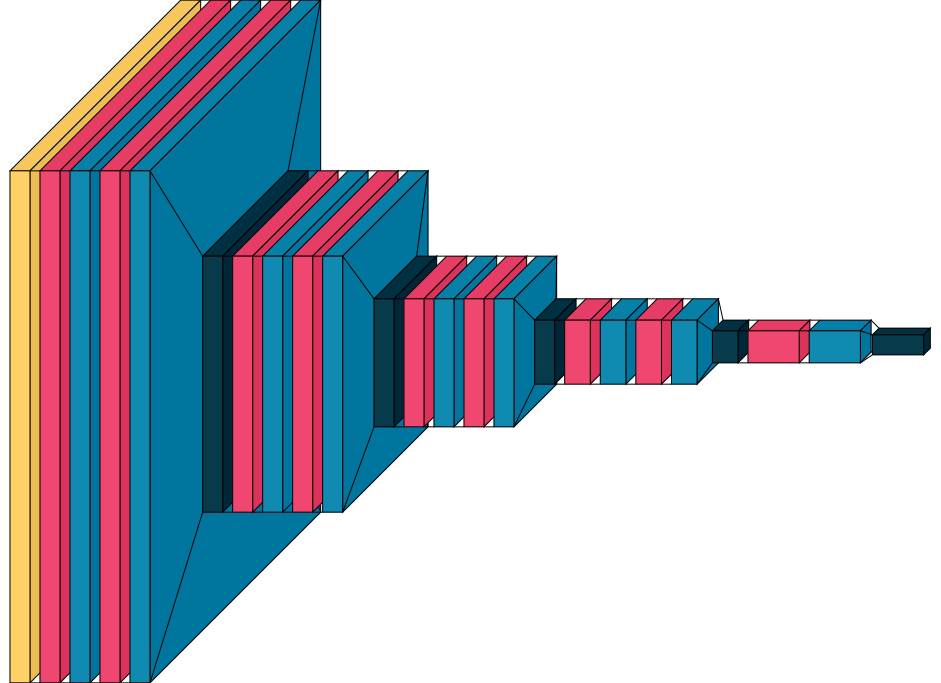

In [68]:
visualkeras.layered_view(encoder_model_R128).show() # display using your system viewer
visualkeras.layered_view(encoder_model_R128)

### Projection into latent space

The projection into latent space is done by a **Dense** layer which takes the flattened vector \( h_{\text{flat}} \) and projects it into a small space \( \text{latent\_dim} \).

#### Formula :

$$
z = f\left( W_{\text{latent}} \cdot h_{\text{flat}} + b_{\text{latent}} \right)
$$

#### Where :

- \(h_{\text{flat}} \)  is the flattened vector of the output of the last convolutional layer, of size \( n \) (for example, \( n = 8 \times 8 \times 512 = 32{,}768 \)).
- \( W_{\text{latent}} \) is the size matrix, of weight  \( (n \times \text{latent\_dim}) \), which allows to transform the flattened vector into a smaller size latent vector.
- \( b_{\text{latent}} \) is the bias associated with this transformation.
- \( z \)  is the vector of latent space, of size \( \text{latent\_dim} \).
- \( f \)  is the activation function, often a non-linear function like ReLU.


In [144]:
# Latent space
# x = Flatten()(encoded)
#latent = Dense(96, activation='relu')(x)
#latent = Dropout(0.4)(latent)

In [ ]:
# convolution function
def conv_block(x, filters, kernel_size=(3, 3), padding='same', strides=(1, 1)):
    conv = Conv2D(filters, kernel_size, strides=strides, padding=padding, activation='relu', kernel_initializer='he_normal')(x)
    conv = BatchNormalization()(conv)  # Standardization to stabilize learning
    return conv

# Encoder 
input_img = Input(shape=(128, 128, 3))      # Image input (128x128x3)
encoded = Input(shape=(4, 4, 512))          # Output encoded from encoder (4x4x512)
skip1 = Input(shape=(128, 128, 32))         # Skip connections
skip2 = Input(shape=(64, 64, 64))
skip3 = Input(shape=(32, 32, 128))
skip4 = Input(shape=(16, 16, 256))

# Decodeur
x = conv_block(encoded, 512)  # 4x4 -> 4x4
x = UpSampling2D((2, 2))(x)  # 4x4 -> 8x8

skip4_resized = conv_block(skip4, 512)  
x = Add()([x, UpSampling2D((2, 2))(skip4_resized)])  # Skip4 devient 8x8
x = conv_block(x, 256)  # 8x8 -> 8x8
x = UpSampling2D((2, 2))(x)  # 8x8 -> 16x16

skip3_resized = conv_block(skip3, 256)  
x = Add()([x, UpSampling2D((2, 2))(skip3_resized)])  
x = conv_block(x, 128)  # 16x16 -> 16x16
x = UpSampling2D((2, 2))(x)  # 16x16 -> 32x32

skip2_resized = conv_block(skip2, 128) 
x = Add()([x, UpSampling2D((2, 2))(skip2_resized)]) 
x = conv_block(x, 64)  # 32x32 -> 32x32
x = UpSampling2D((2, 2))(x)  # 32x32 -> 64x64

skip1_resized = conv_block(skip1, 64)  
x = Add()([x, UpSampling2D((2, 2))(skip1_resized)]) 
x = conv_block(x, 32)  # 64x64 -> 64x64
x = UpSampling2D((2, 2))(x)  # 64x64 -> 128x128

decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)  # 128x128x3

# Decoder model
decoder_model_R128 = Model(inputs=[encoded, skip1, skip2, skip3, skip4], outputs=decoded)

# Display the model summary to check the structure
decoder_model_R128.summary()

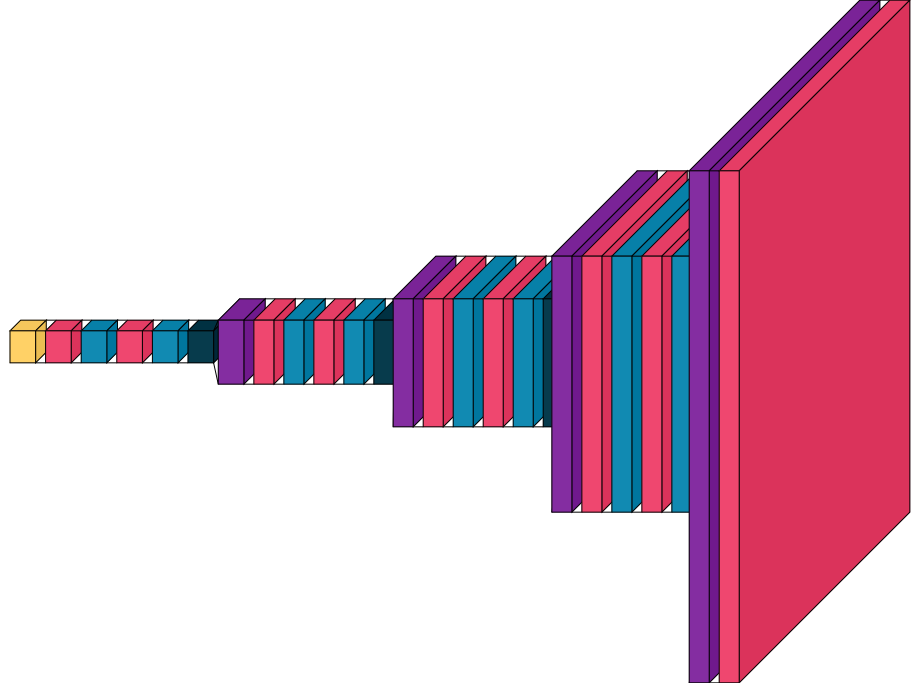

In [50]:
visualkeras.layered_view(decoder_model_R128).show() # display using your system viewer
visualkeras.layered_view(decoder_model_R128)

In [31]:
def ssim_loss(y_true, y_pred):
    return 1 - tf.reduce_mean(tf.image.ssim(y_true, y_pred, max_val=1.0))

def DenoisingUNet(input_shape=(128, 128, 3)):
    # Input Layer
    inputs = layers.Input(shape=input_shape)

    # ENCODER (Downsampling)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)  # 128x128 -> 64x64

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)  # 64x64 -> 32x32

    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)  # 32x32 -> 16x16

    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    p4 = layers.MaxPooling2D((2, 2))(c4)  # 16x16 -> 8x8

    # bottleneck layer
    bn = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    bn = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(bn)

    # DECODER (Upsampling)
    u4 = layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(bn)  # 8x8 -> 16x16
    u4 = layers.Concatenate()([u4, c4])
    c5 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(u4)
    c5 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c5)

    u3 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c5)  # 16x16 -> 32x32
    u3 = layers.Concatenate()([u3, c3])
    c6 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u3)
    c6 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c6)

    u2 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c6)  # 32x32 -> 64x64
    u2 = layers.Concatenate()([u2, c2])
    c7 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u2)
    c7 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c7)

    u1 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c7)  # 64x64 -> 128x128
    u1 = layers.Concatenate()([u1, c1])
    c8 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u1)
    c8 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c8)

    outputs = layers.Conv2D(3, (1, 1), activation='sigmoid')(c8)  # Couche finale avec 3 canaux pour RGB

    model = models.Model(inputs, outputs)
    return model

denoising_unet = DenoisingUNet(input_shape=(128, 128, 3))
denoising_unet.compile(optimizer='adam', loss=ssim_loss, metrics=[ssim_loss])

denoising_unet.summary()

# Initialization of the early stopping to stop the training if the validation does not improve
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_ssim_loss', patience=10, mode='max', restore_best_weights=True)

# Train the model on the noisy and clean images
history = denoising_unet.fit(
    train_noisy_augmented_L1000_R128,       # Training noise data
    train_images_augmented_L1000_R128,      # Clear training data
    epochs=100,                             
    batch_size=32,                          
    validation_data=(test_noisy_augmented_L1000_R128, test_images_augmented_L1000_R128),  # Validation
    callbacks=[early_stopping]              # Callback for early stopping
)

# Save the model if needed after training
# denoising_unet.save('denoising_unet_model_ssim.h5')


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10      │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_40 (Conv2D)  │ (None, 128, 128,  │      1,792 │ input_layer_10[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_41 (Conv2D)  │ (None, 128, 128,  │     36,928 │ conv2d_40[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 64, 64,    │          0 │ conv2d_41[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_42 (Conv2D)  │ (None, 64, 64,    │     73,856 │ max_pooling2d_8[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_43 (Conv2D)  │ (None, 64, 64,    │    147,584 │ conv2d_42[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_9     │ (None, 32, 32,    │          0 │ conv2d_43[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_44 (Conv2D)  │ (None, 32, 32,    │    295,168 │ max_pooling2d_9[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_45 (Conv2D)  │ (None, 32, 32,    │    590,080 │ conv2d_44[0][0]   │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_10    │ (None, 16, 16,    │          0 │ conv2d_45[0][0]   │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_46 (Conv2D)  │ (None, 16, 16,    │  1,180,160 │ max_pooling2d_10… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_47 (Conv2D)  │ (None, 16, 16,    │  2,359,808 │ conv2d_46[0][0]   │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_11    │ (None, 8, 8, 512) │          0 │ conv2d_47[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_48 (Conv2D)  │ (None, 8, 8,      │  4,719,616 │ max_pooling2d_11… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_49 (Conv2D)  │ (None, 8, 8,      │  9,438,208 │ conv2d_48[0][0]   │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_8  │ (None, 16, 16,    │  2,097,664 │ conv2d_49[0][0]   │
│ (Conv2DTranspose)   │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_8       │ (None, 16, 16,    │          0 │ conv2d_transpose

 Total params: 31,031,875 (118.38 MB)

 Trainable params: 31,031,875 (118.38 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - loss: 0.7009 - ssim_loss: 0.7009 - val_loss: 0.5871 - val_ssim_loss: 0.5871
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 70s 3s/step - loss: 0.5649 - ssim_loss: 0.5649 - val_loss: 0.5572 - val_ssim_loss: 0.5567
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - loss: 0.5461 - ssim_loss: 0.5461 - val_loss: 0.5457 - val_ssim_loss: 0.5457
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - loss: 0.5340 - ssim_loss: 0.5340 - val_loss: 0.5294 - val_ssim_loss: 0.5293
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - loss: 0.5212 - ssim_loss: 0.5212 - val_loss: 0.5208 - val_ssim_loss: 0.5205
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - loss: 0.5122 - ssim_loss: 0.5122 - val_loss: 0.5049 - val_ssim_loss: 0.5057
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - loss: 0.4951 - ssim_loss: 0.4951 - val_loss: 0.5051 - val_ssim_loss: 0.5061
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - loss: 0.4926 - ssim_loss: 0.4926 - val_loss:

In [51]:
# Autoencodeur complet
autoencoder = Model(input_img, decoded)

# Compilation du modèle avec la fonction de perte combinée
autoencoder.compile(optimizer=optimizer, loss=combined_loss)

# Affichage du résumé du modèle
autoencoder.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_13 (Conv2D)  │ (None, 128, 128,  │        896 │ input_layer_6[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        128 │ conv2d_13[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_14 (Conv2D)  │ (None, 128, 128,  │      9,248 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        128 │ conv2d_14[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 128, 128,  │          0 │ batch_normalizat… │
│                     │ 32)               │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 64, 64,    │          0 │ add[0][0]         │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_15 (Conv2D)  │ (None, 64, 64,    │     18,496 │ max_pooling2d_4[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        256 │ conv2d_15[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_16 (Conv2D)  │ (None, 64, 64,    │     36,928 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        256 │ conv2d_16[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 64, 64,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 32, 32,    │          0 │ add_1[0][0]       │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_17 (Conv2D)  │ (None, 32, 32,    │     73,856 │ max_pooling2d_5[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        512 │ conv2d_17[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_18 (Conv2D)  │ (None, 32, 32,    │    147,584 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        512 │ conv2d_18[0][0] 

 Total params: 2,942,019 (11.22 MB)

 Trainable params: 2,938,179 (11.21 MB)

 Non-trainable params: 3,840 (15.00 KB)

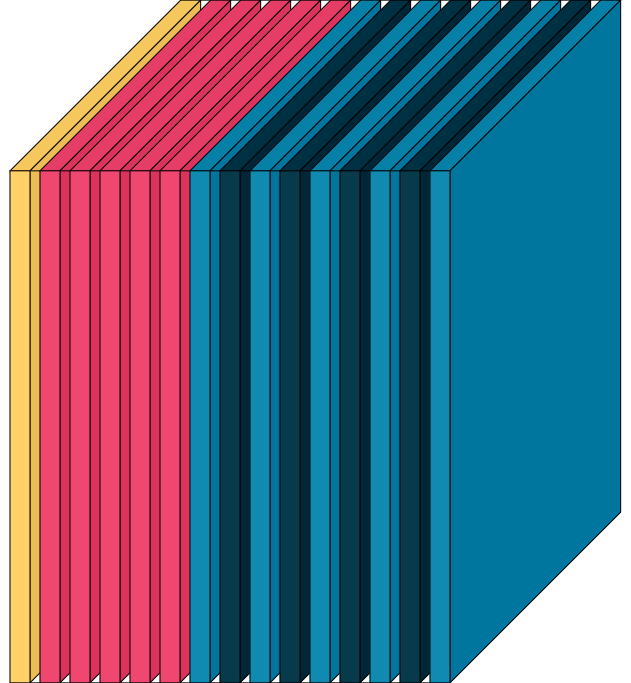

In [76]:
visualkeras.layered_view(rednet_model).show() # display using your system viewer
visualkeras.layered_view(rednet_model)

In [53]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [54]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

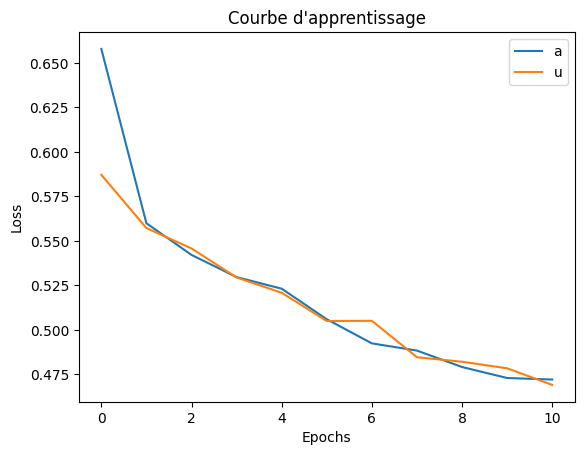

In [33]:
# Visualization of learning (train) and validation (test) losses
plt.plot(history.history['loss'], label='train')       
plt.plot(history.history['val_loss'], label='test')     
plt.legend("autoencodeur R128")
plt.title('Courbe d\'apprentissage')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

**Our model seems to have a pretty good performance. Let's check our prediction.**

In [38]:
# Check the shape of input images
print(f"Forme des données d'entraînement : {train_noisy_augmented_L1000_R128.shape}")
print(f"Forme des données de test : {test_noisy_augmented_L1000_R128.shape}")

# Check the template input form
print(f"Forme d'entrée attendue par le modèle : {autoencoder.input_shape}")

Forme des données d'entraînement : (800, 128, 128, 3)
Forme des données de test : (200, 128, 128, 3)
Forme d'entrée attendue par le modèle : (None, 128, 128, 3)


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 535ms/step


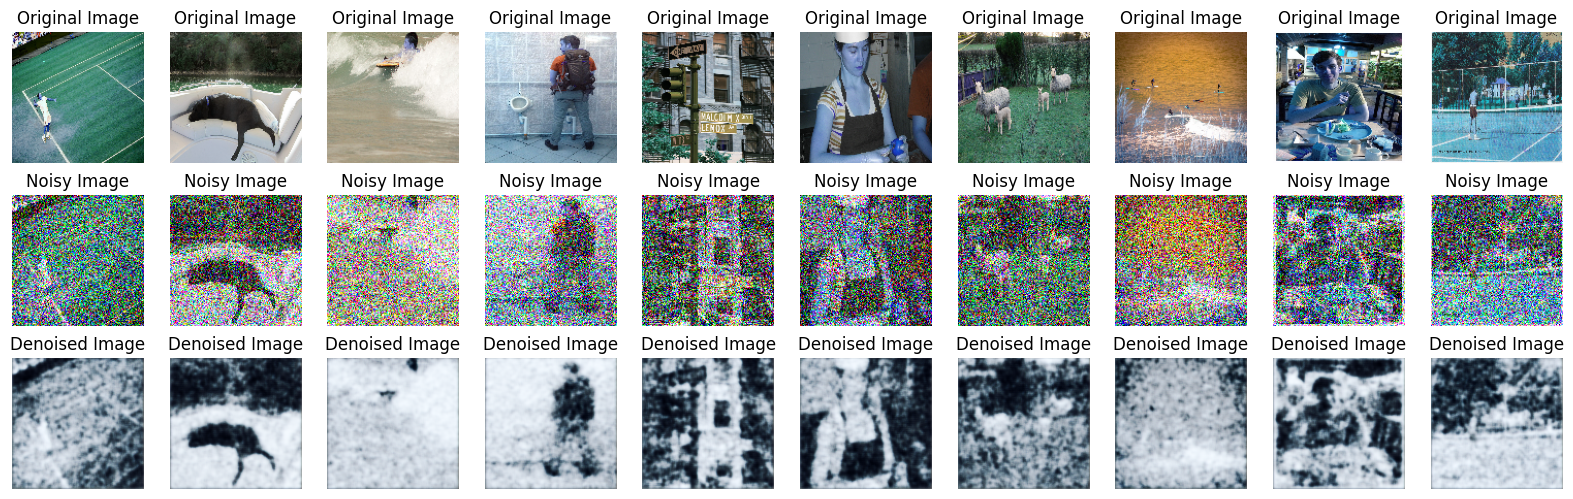

In [35]:
# Prediction of the images bruised with the autoencoder
decoded_imgs = denoising_unet.predict(test_noisy_augmented_L1000_R128)

# Function to normalize images for display
def normalize_image(image):
    image = (image - np.min(image)) / (np.max(image) - np.min(image))  
    return image.astype(np.float32) 

# Number of images to display
n = 10

plt.figure(figsize=(20, 6))
for i in range(n):
    # Display of original images
    ax = plt.subplot(3, n, i  + 1)
    plt.imshow(normalize_image(test_images_augmented_L1000_R128[i]))
    plt.title("Original Image")
    plt.axis("off")

    # Display of noisy images
    ax = plt.subplot(3, n, i+n + 1)
    plt.imshow(normalize_image(test_noisy_augmented_L1000_R128[i]))
    plt.title("Noisy Image")
    plt.axis("off")

    # Display of the corrected images
    ax = plt.subplot(3, n, i +2* n + 1)
    plt.imshow(normalize_image(decoded_imgs[i]))
    plt.title("Denoised Image")
    plt.axis("off")

plt.show()


The results indicate that the images have been **effectively denoised**, showcasing a notable improvement in clarity and detail. However, there is still room for enhancement, particularly concerning **`color fidelity`** and **`blurring`**, as some colors appear to be lost and become blurry in the denoising process. 

To address these issues, retraining the autoencoder on **larger resolutions images** could be beneficial. Larger images typically contain more information and finer details, allowing the model to learn better representations of color and texture. This increased resolution can help preserve color information during the denoising process, ultimately leading to higher-quality outputs and a more accurate reconstruction of the original images. By utilizing higher-resolution images, we can improve the autoencoder's performance, ensuring that it captures both the structural and color nuances present in the data.

### 4.4. CAE with resized images (256x256) on the dataset (1000)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 286s 11s/step - loss: 0.5401 - mse: 0.0843 - val_loss: 0.4831 - val_mse: 0.0381
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 320s 13s/step - loss: 0.4731 - mse: 0.0460 - val_loss: 0.4553 - val_mse: 0.0322
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 280s 11s/step - loss: 0.4365 - mse: 0.0285 - val_loss: 0.4148 - val_mse: 0.0173
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 270s 11s/step - loss: 0.4347 - mse: 0.0285 - val_loss: 0.4636 - val_mse: 0.0448
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 271s 11s/step - loss: 0.4265 - mse: 0.0274 - val_loss: 0.4158 - val_mse: 0.0243
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 266s 11s/step - loss: 0.4122 - mse: 0.0236 - val_loss: 0.3988 - val_mse: 0.0160
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 267s 11s/step - loss: 0.4041 - mse: 0.0208 - val_loss: 0.4308 - val_mse: 0.0343
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 269s 11s/step - loss: 0.4081 - mse: 0.0233 - val_loss: 0.4045 - val_mse: 0.0189
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 262s 11s/

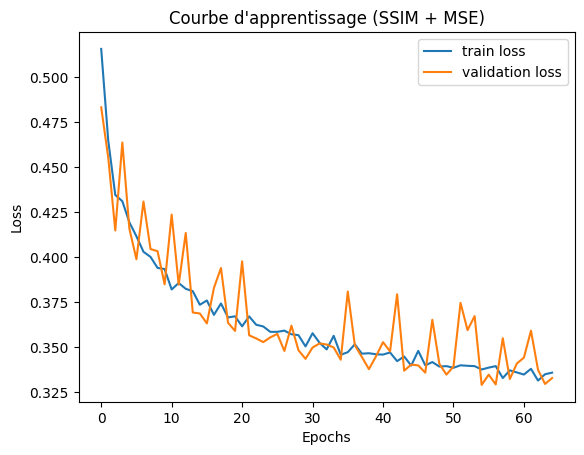

7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step


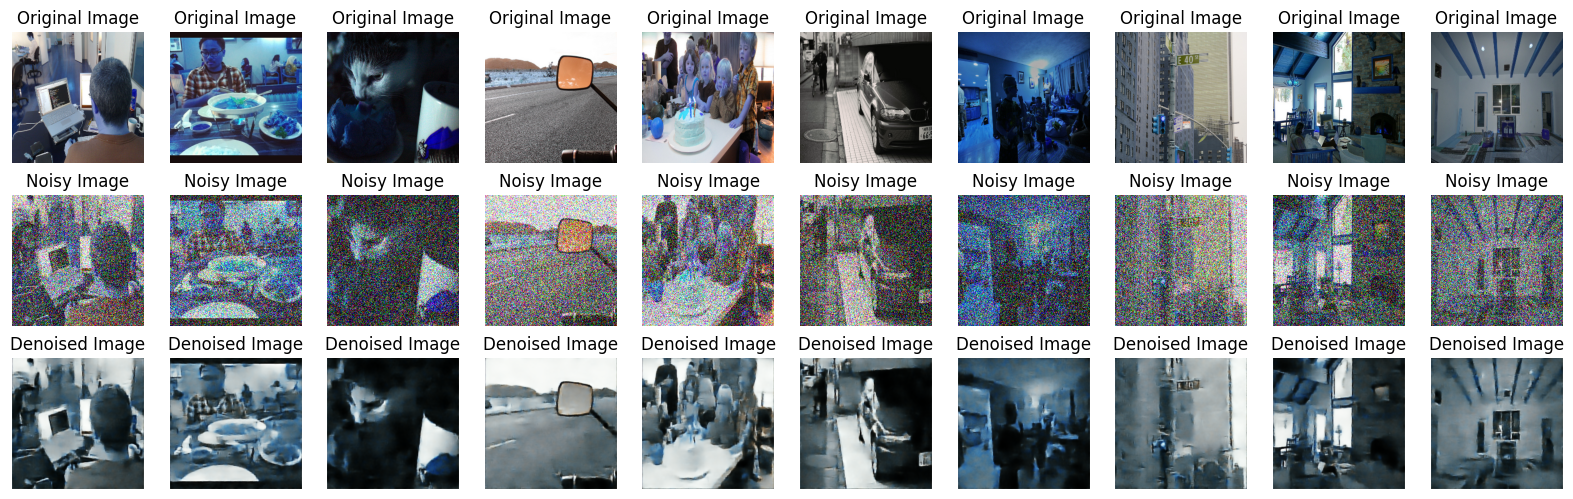

In [27]:
def combined_ssim_mse_loss(y_true, y_pred):
    ssim_loss_value = 1 - tf.reduce_mean(tf.image.ssim(y_true, y_pred, max_val=1.0))
    mse_loss_value = tf.reduce_mean(tf.square(y_true - y_pred))
    combined_loss = 0.8 * ssim_loss_value + 0.2 * mse_loss_value
    return combined_loss

def DenoisingUNet(input_shape=(256, 256, 3)):
    inputs = layers.Input(shape=input_shape)
    
    # ENCODER (Downsampling)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    p4 = layers.MaxPooling2D((2, 2))(c4)

    # bottleneck layer
    bn = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    bn = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(bn)

    # DECODER (Upsampling)
    u4 = layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(bn)
    u4 = layers.Concatenate()([u4, c4])
    c5 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(u4)
    c5 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c5)

    u3 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c5)
    u3 = layers.Concatenate()([u3, c3])
    c6 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u3)
    c6 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c6)

    u2 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c6)
    u2 = layers.Concatenate()([u2, c2])
    c7 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u2)
    c7 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c7)

    u1 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c7)
    u1 = layers.Concatenate()([u1, c1])
    c8 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u1)
    c8 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c8)

    outputs = layers.Conv2D(3, (1, 1), activation='sigmoid')(c8)
    
    model = models.Model(inputs, outputs)
    return model

# Creation and compilation of the model with RMSprop and the combined loss function
denoising_unet = DenoisingUNet(input_shape=(256, 256, 3))
denoising_unet.compile(optimizer='rmsprop', loss=combined_ssim_mse_loss, metrics=['mse'])

# model training
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = denoising_unet.fit(
    train_noisy_augmented_L1000_R256,       
    train_images_augmented_L1000_R256,    
    epochs=100,                             
    batch_size=32,                          
    validation_data=(test_noisy_augmented_L1000_R256, test_images_augmented_L1000_R256),  
    callbacks=[early_stopping]             
)

# Display of loss curves
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Courbe d\'apprentissage (SSIM + MSE)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Prediction of the denoised images
decoded_imgs = denoising_unet.predict(test_noisy_augmented_L1000_R256)

# Function to normalize images
def normalize_image(image):
    image = (image - np.min(image)) / (np.max(image) - np.min(image))  
    return image.astype(np.float32)


n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(normalize_image(test_images_augmented_L1000_R256[i]))
    plt.title("Original Image")
    plt.axis("off")

    ax = plt.subplot(3, n, i + n + 1)
    plt.imshow(normalize_image(test_noisy_augmented_L1000_R256[i]))
    plt.title("Noisy Image")
    plt.axis("off")

    ax = plt.subplot(3, n, i + 2 * n + 1)
    plt.imshow(normalize_image(decoded_imgs[i]))
    plt.title("Denoised Image")
    plt.axis("off")

plt.show()

## Conclusion : 

In conclusion, our denoising autoencoder has demonstrated **impressive performance in improving image quality**. 
- The denoising process has proven to be highly effective, successfully reducing noise and restoring clarity to the images. 
- We have managed to address the issue of blurriness, resulting in sharper and more defined outputs. 
- Additionally, we have taken significant steps to mitigate the loss of color fidelity, ensuring that the reconstructed images retain more of their original vibrancy. 

Overall, the results indicate a successful application of our autoencoder model for denoising task and image processing.